### EDA CLEANING
#### Description: 
Dans ce NoteBook, nous nettoyons les données brutes du dataset GWAS. Ceci implique la suppression des colonnes non pertinentes, le renommage et la réorganisation des attributs, etc.
Nous sauvegarderons la dataframe nettoyée sous format csv pour la suite des travaux: exploration, modélisation, etc.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set(color_codes=True)

In [ ]:
file_location='C:\\Users\\DELL\\Documents\\THESE\\DATA\\Data_Bernadette\\MORPHO_GWAS.csv'

In [ ]:
dbase=pd.read_table(file_location, sep=';', encoding="latin-1")

In [ ]:
dbase.shape

(586, 64)

In [ ]:
dbase['Genotype'].value_counts()

Genotype
crossbread zebu and Baoulé    229
Baoulé                        156
CRossbread zebu and Baoulé     40
Crossbread zebu and Baoulé      1
Name: count, dtype: int64

In [ ]:
dbase.columns

Index(['Name and first name of investigator', 'Name of breeder',
       'Date of investigation', 'Village/Site', 'Province', 'site code',
       'Identification', 'Age', 'Sexe', 'Genotype', 'Entry mode',
       'Identification of mother', 'head length', 'cranial length',
       'head width', 'cranial width', 'facial length', 'Facial width',
       'Muzzle circumference', 'Horn length', 'Distance Point -point horn',
       'Distance Base-Base horn', 'Earn length', 'Head profile',
       'Ears position', 'Color of muzzle', 'Head Tache', 'Eyelid pigmentation',
       'Color hoof', 'Color of horn', 'Dewlap size', 'Hump position',
       'Presence of horn', 'Backline', 'Horn shape', 'heigth at weithers',
       'Thoracic perimeter', 'heigth at sacrum', 'Body length',
       'length of scapula-Ischium ', 'Basin lenght', 'Hip width',
       'Ischium width', 'Tail length', 'Chest depth', 'Shoulder Width',
       'Chest width', 'Height of the hump', 'Teat Length', 'weight',
       'General of t

In [ ]:
dbase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name and first name of investigator  426 non-null    object 
 1   Name of breeder                      586 non-null    object 
 2   Date of investigation                586 non-null    object 
 3   Village/Site                         585 non-null    object 
 4   Province                             586 non-null    object 
 5   site code                            586 non-null    object 
 6   Identification                       586 non-null    int64  
 7   Age                                  427 non-null    object 
 8   Sexe                                 586 non-null    object 
 9   Genotype                             426 non-null    object 
 10  Entry mode                           426 non-null    object 
 11  Identification of mother        

@@@
Nous constatons qu'il y a bcp de colonnes de type 'object' alors qu'en réalité elles sont numériques. Il ya donc un grand travail de nettoyage à effectuer 

In [ ]:
dbase.dtypes

Name and first name of investigator    object
Name of breeder                        object
Date of investigation                  object
Village/Site                           object
Province                               object
                                        ...  
If yes, specify color                  object
Discolored abdomen                     object
Speckle                                object
Local name of the breed                object
Development of breasts                 object
Length: 64, dtype: object

@@@ Il y a des colonnes visiblement non pertinentes pour l'étude des taurins. 
Nous supprimons les colonnes non pertinentes

In [ ]:
col_non_pertinentes=['Name and first name of investigator', 'Name of breeder', 'Date of investigation', 'Village/Site', 'Province', 'site code', 'Identification', 'Entry mode', 'Identification of mother', 'Local name of the breed']
db=dbase.drop(col_non_pertinentes, axis=1) 
db.shape

(586, 54)

In [ ]:
db['Age'].dtypes

dtype('O')

In [ ]:
#db['Age']=(dbase['Age']).astype(np.float64)

In [ ]:
db['Age'].unique()

array(['3', '5', '9', '10', '8', '6', '7', '15', '4', '16', '2', '12',
       '11', '17', '14', '13', '0', '3,5', '4,5', nan, '4 ans'],
      dtype=object)

!!! Ca ne marche pas parce qu'il y a des caractères incompatibles

In [ ]:
db['Age']=db['Age'].str.replace(',', '.')
db['Age']=db['Age'].str.replace('an', '')
db['Age']=db['Age'].str.replace('ans', '')
db['Age']=db['Age'].str.replace('s', '')
db['Age']=(db['Age']).astype(np.float64)  

In [ ]:
db['Age'].dtypes

dtype('float64')

@@@ Nous faisons de même pour les autres attributs numériques.

In [ ]:
db['head length']=db['head length'].str.replace(',', '.')
db['head length']=(db['head length']).astype(np.float64)

In [ ]:
db['cranial length']=db['cranial length'].str.replace(',', '.')
db['cranial length']=(db['cranial length']).astype(np.float64)

In [ ]:
db['cranial width']=db['cranial width'].str.replace(',', '.')
db['cranial width']=(db['cranial width']).astype(np.float64)

In [ ]:
db['head width']=db['head width'].str.replace(',', '.')
db['head width']=(db['head width']).astype(np.float64)

In [ ]:
db['Facial width']=db['Facial width'].str.replace(',', '.')
db['Facial width']=(db['Facial width']).astype(np.float64)

In [ ]:
db['facial length']=db['facial length'].str.replace(',', '.')
db['facial length']=(db['facial length']).astype(np.float64)

In [ ]:
db['Muzzle circumference']=db['Muzzle circumference'].str.replace(',', '.')
db['Muzzle circumference']=(db['Muzzle circumference']).astype(np.float64)

In [ ]:
db['Horn length']=db['Horn length'].str.replace(',', '.')
db['Horn length']=(db['Horn length']).astype(np.float64)

In [ ]:
db['Distance Point -point horn']=db['Distance Point -point horn'].str.replace(',', '.')
db['Distance Point -point horn']=(db['Distance Point -point horn']).astype(np.float64)

In [ ]:
db['Earn length']=db['Earn length'].str.replace(',', '.')
db['Earn length']=(db['Earn length']).astype(np.float64)

In [ ]:
db['heigth at weithers']=db['heigth at weithers'].str.replace(',', '.')
db['heigth at weithers']=(db['heigth at weithers']).astype(np.float64)

In [ ]:
db['Thoracic perimeter']=db['Thoracic perimeter'].str.replace(',', '.')
db['Thoracic perimeter']=(db['Thoracic perimeter']).astype(np.float64)

In [ ]:
db['heigth at sacrum']=db['heigth at sacrum'].str.replace(',', '.')
db['heigth at sacrum']=(db['heigth at sacrum']).astype(np.float64)

In [ ]:
db['Body length']=db['Body length'].str.replace(',', '.')
db['Body length']=(db['Body length']).astype(np.float64)

In [ ]:
#db['length of scapula-Ischium']=db['length of scapula-Ischium'].str.replace(',', '.')
#db['length of scapula-Ischium']=(db['length of scapula-Ischium']).astype(np.float64)

@@@ Ca ne marche pas parcequ'il ya un espace après scapula-Ischium.
Nous supprimerons l'espace quand nous renommerons les colonnes

In [ ]:
db['length of scapula-Ischium ']=db['length of scapula-Ischium '].str.replace(',', '.')
db['length of scapula-Ischium ']=(db['length of scapula-Ischium ']).astype(np.float64)

In [ ]:
db['Basin lenght']=db['Basin lenght'].str.replace(',', '.')
db['Basin lenght']=(db['Basin lenght']).astype(np.float64)

@@@ Ici 'lenght' est mal écrit. Nous corrigerons quand nous renommerons les colonnes

In [ ]:
db['Hip width']=db['Hip width'].str.replace(',', '.')
db['Hip width']=(db['Hip width']).astype(np.float64)

In [ ]:
db['Ischium width']=db['Ischium width'].str.replace(',', '.')
db['Ischium width']=(db['Ischium width']).astype(np.float64)

In [ ]:
db['Tail length']=db['Tail length'].str.replace(',', '.')
db['Tail length']=(db['Tail length']).astype(np.float64)

In [ ]:
db['Chest depth']=db['Chest depth'].str.replace(',', '.')
db['Chest depth']=(db['Chest depth']).astype(np.float64)

In [ ]:
db['Shoulder Width']=db['Shoulder Width'].str.replace(',', '.')
db['Shoulder Width']=(db['Shoulder Width']).astype(np.float64)

In [ ]:
db['Chest width']=db['Chest width'].str.replace(',', '.')
db['Chest width']=(db['Chest width']).astype(np.float64)

In [ ]:
db['Height of the hump']=db['Height of the hump'].str.replace(',', '.')
db['Height of the hump']=(db['Height of the hump']).astype(np.float64)

In [ ]:
db['Teat Length']=db['Teat Length'].str.replace(',', '.')
db['Teat Length']=(db['Teat Length']).astype(np.float64)

In [ ]:
db['Distance Base-Base horn']=db['Distance Base-Base horn'].str.replace(',', '.')
db['Distance Base-Base horn']=(db['Distance Base-Base horn']).astype(np.float64)

In [ ]:
db.describe()

,Age,head length,cranial length,head width,cranial width,facial length,Facial width,Muzzle circumference,Horn length,Distance Point -point horn,...,Basin lenght,Hip width,Ischium width,Tail length,Chest depth,Shoulder Width,Chest width,Height of the hump,Teat Length,weight
count,427.000000,585.000000,585.000000,585.000000,585.000000,426.000000,585.000000,585.000000,577.000000,568.000000,...,586.000000,586.000000,586.000000,584.000000,586.000000,586.000000,586.000000,426.000000,533.000000,583.000000
mean,6.672131,42.361538,20.139316,16.605983,15.356410,22.336854,13.024786,36.047863,21.142114,32.653169,...,32.083618,30.122867,17.616041,94.698459,51.256826,25.874061,13.875939,4.130282,1.905253,204.744425
std,2.873956,4.166953,2.380499,1.997828,2.586662,3.653495,41.333558,3.082113,11.330602,11.789465,...,6.539610,3.880844,8.906601,16.513055,5.042232,3.540883,37.451098,20.968100,1.330290,56.693650
min,0.000000,31.000000,14.000000,10.000000,10.000000,0.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000
25%,4.250000,39.500000,19.000000,15.000000,14.000000,20.000000,10.000000,34.000000,12.000000,25.000000,...,29.000000,28.000000,11.000000,85.000000,48.500000,24.000000,10.000000,0.000000,0.500000,174.000000
50%,6.000000,42.000000,20.000000,17.000000,15.000000,22.500000,11.000000,36.000000,18.000000,31.000000,...,32.000000,30.000000,14.000000,94.200000,51.000000,26.000000,12.000000,0.000000,2.000000,202.000000
75%,8.000000,46.000000,22.000000,18.000000,16.000000,25.000000,12.000000,38.000000,29.000000,40.000000,...,35.000000,33.000000,26.000000,105.125000,54.000000,28.000000,13.000000,0.000000,3.000000,240.000000
max,17.000000,54.000000,30.000000,30.000000,27.000000,37.000000,1010.000000,47.000000,57.000000,81.000000,...,95.000000,41.000000,42.000000,140.000000,81.000000,40.000000,905.000000,122.000000,6.000000,400.000000


@@@ Nous avons desormais 27 colonnes numériques

Renommons certaines variables

In [ ]:
db.rename(columns={ "Distance Point -point horn": "distance point horn",  "Distance Base-Base horn":"distance base horn", "stripe mullet            ": "stripe mullet"}, inplace=True)
db.rename(columns={"length of scapula-Ischium ":"length scapula ischium", "General of the dress appearance":"dress appearance", "Local name of the breed": "local breed name", "Age": "age"}, inplace=True)
db.rename(columns={ "Basin lenght": "basin length",  "Shoulder Width":"shoulder width", "Teat Length": "teat length"}, inplace=True) 

In [ ]:
db.rename(columns={"Sexe": "sex",  "Color of muzzle" : "muzzle color", "Head Tache":"head tache", "Eyelid pigmentation":"eyelid pigmentation"}, inplace=True)
db.rename(columns={ "Color hoof": "hoof color",  "Dewlap size":"dewlap size", "Hump position":"hump position", "Presence of horn":"presence horn"}, inplace=True)
db.rename(columns={ "Backline": "backline",  "Horn shape": "horn shape", "Genotype": "genotype", "Facial width": "facial width"}, inplace=True)

In [ ]:
db.rename(columns={"Muzzle circumference": "muzzle circumference",  "Horn length":"horn length", "Earn length":"ear length", "Head profile":"head profile"}, inplace=True)
db.rename(columns={ "Ears position": "ear position",  "Color of horn":"horn color", "Thoracic perimeter":"thoracic perimeter", "Body length": "body length"}, inplace=True)
db.rename(columns={ "Hip width": "hip width",  "Ischium width": "ischium width", "Tail length": "tail length", "Chest depth": "chest depth"}, inplace=True)

In [ ]:
db.rename(columns={ "Chest width": "chest width",  "Height of the hump": "hump height", "Type of hair": "hair type", "Coat color": "coat color"}, inplace=True)
db.rename(columns={ "Blackness": "blackness",  "Brindling": "brindling", "Extremity": "extremity", "Color of chignon": "chignon color"}, inplace=True)
db.rename(columns={ "If yes, specify color": "specify color",  "Discolored abdomen": "discolored abdomen", "Speckle": "speckle", "Development of breasts": "breast development"}, inplace=True)

In [ ]:
db.rename(columns={ "heigth at weithers": "withers height",  "heigth at sacrum": "sacrum height"}, inplace=True)

In [ ]:
db.columns

Index(['age', 'sex', 'genotype', 'head length', 'cranial length', 'head width',
       'cranial width', 'facial length', 'facial width',
       'muzzle circumference', 'horn length', 'distance point horn',
       'distance base horn', 'ear length', 'head profile', 'ear position',
       'muzzle color', 'head tache', 'eyelid pigmentation', 'hoof color',
       'horn color', 'dewlap size', 'hump position', 'presence horn',
       'backline', 'horn shape', 'withers height', 'thoracic perimeter',
       'sacrum height', 'body length', 'length scapula ischium',
       'basin length', 'hip width', 'ischium width', 'tail length',
       'chest depth', 'shoulder width', 'chest width', 'hump height',
       'teat length', 'weight', 'dress appearance', 'hair type', 'coat color',
       'blackness', 'white variegations', 'brindling', 'stripe mullet',
       'extremity', 'chignon color', 'specify color', 'discolored abdomen',
       'speckle', 'breast development'],
      dtype='object')

In [ ]:
db['sex'].unique()

array(['Male', 'Female', 'Maleale'], dtype=object)

Comme pour la variable 'sex', les valeurs des variables qualitatives sont à arranger

In [ ]:
db['muzzle color'].unique()

array(['Pigmented', 'No pigmented', 'No Pigmented', nan, ' No pigmented'],
      dtype=object)

In [ ]:
db['sex']=db['sex'].replace(to_replace=['Maleale'], value=['Male'])
db['muzzle color']=db['muzzle color'].replace(to_replace=['No pigmented', 'No Pigmented', ' No pigmented'], value=['Not pigmented', 'Not pigmented', 'Not pigmented'])
db['head tache']=db['head tache'].replace(to_replace=['no', 'yes', 'NO'], value=['No', 'Yes', 'No'])
db['eyelid pigmentation']=db['eyelid pigmentation'].replace(to_replace=['Pigmentation (black)', 'Not pigmentation (white', 'Non Pigmented', 'Pigmentd'], value=['Pigmented', 'Not pigmented', 'Not pigmented', 'Pigmented'])
db['hoof color']=db['hoof color'].replace(to_replace=['No pigmented' ], value=['Not pigmented'])
db['dewlap size']=db['dewlap size'].replace(to_replace=['Well developed', 'small developped', 'Developped'], value=['Well developped', 'Small developped', 'Well developped'])
db['hump position']=db['hump position'].replace(to_replace=['0'], value=['Absence'])
db['presence horn']=db['presence horn'].replace(to_replace=['0', 'No,'], value=['No', 'No']) 
db['backline']=db['backline'].replace(to_replace=['rectilinear'], value=['Rectilinear'])
db['horn shape']=db['horn shape'].replace(to_replace=['', 'cup', 'CUP', 'Couronne'], value=[np.nan, 'Cup', 'Cup', 'Crown'])

On poursuit les modifications des valeurs. On change un peu le nom des valeurs catégorielles qui peuvent porter à confusion, et en prévision d'un mapping

In [ ]:
db['coat color']=db['coat color'].replace(to_replace=['black - pied', 'BLACK', 'red - pied', 'white', 'Red- pie', 'Pie-Roan', 'Black '], value=['Black-pied', 'Black', 'Red-pied', 'White', 'Red-pied', 'Pied-roan', 'Black']) 
db['blackness']=db['blackness'].replace(to_replace=['slightly charred', '0', 'ABSENT', 'medium charred', 'charred strongly', ' Charred Strongly'], value=['Slightly charred', 'Absent', 'Absent', 'Medium charred', 'Strongly charred', 'Strongly charred'])
db['white variegations']=db['white variegations'].replace(to_replace=['0', 'ABSENT'], value=['Absent', 'Absent'])
db['stripe mullet']=db['stripe mullet'].replace(to_replace=['0', 'ABSENT', 'dark'], value=['Absent', 'Absent', 'Dark'])
db['extremity']=db['extremity'].replace(to_replace=['faded'], value=['Faded'])
db['chignon color']=db['chignon color'].replace(to_replace=['NO', 'no'], value=['No', 'No'])
db['discolored abdomen']=db['discolored abdomen'].replace(to_replace=['NO', 'no', 'yes'], value=['No', 'No', 'Yes'])
db['speckle']=db['speckle'].replace(to_replace=['0', 'NO', 'no', 'yes'], value=['Absent', 'No', 'No', 'Yes'])
db['breast development']=db['breast development'].replace(to_replace=['ABSENT', '0', 'well developped', 'Developped'], value=['Absent', 'Absent', 'Well developped', 'Well developped'])
db['genotype']=db['genotype'].replace(to_replace=['crossbread zebu and Baoulé', 'CRossbread zebu and Baoulé', 'Crossbread zebu and Baoulé', 'Baoulé'], value=['Crossbread', 'Crossbread', 'Crossbread', 'Lobi'])

In [ ]:
db['genotype'].value_counts()

genotype
Crossbread    270
Lobi          156
Name: count, dtype: int64

In [ ]:
db['genotype'].unique()

array(['Lobi', 'Crossbread', nan], dtype=object)

In [ ]:
db['genotype'].isnull().sum()

np.int64(160)

In [ ]:
db['brindling']=db['brindling'].replace(to_replace=['0', 'ABSENT', 'slightly brindle', 'strongly brindle', 'no'], value=[np.nan, 'No brindle', 'Slightly brindle', 'Strongly brindle', 'No brindle'])
db['breast development']=db['breast development'].replace(to_replace=['Absent'], value=['Absent-breasts'])
db['stripe mullet']=db['stripe mullet'].replace(to_replace=['Absent'], value=['Absent-stripe'])
db['speckle']=db['speckle'].replace(to_replace=['Absent'], value=['Absent-speckle'])
db['white variegations']=db['white variegations'].replace(to_replace=['Absent'], value=['Absent-whiteVariegations'])
db['coat color']=db['coat color'].replace(to_replace=['Absent', 'Black - pied'], value=[np.nan, 'Black-pied'])
db['hump position']=db['hump position'].replace(to_replace=['Absence'], value=['Absent-hump'])
db['dress appearance']=db['dress appearance'].replace(to_replace=['Pie'], value=['Pied'])
db['blackness']=db['blackness'].replace(to_replace=['Absent'], value=['Absent-blackness'])

In [ ]:
qualitative_col = db.select_dtypes('object').drop('genotype', axis=1).columns
quantitative_col = db.select_dtypes('float').columns

In [ ]:
db['brindling'].isnull().sum()

np.int64(471)

In [ ]:
db['specify color'].value_counts()

specify color
White            83
ROAN              9
BLACK             7
FAWN              1
WHITE             1
SLIGHTLY ROAN     1
RED               1
WHITE             1
Noir              1
Name: count, dtype: int64

In [ ]:
db.shape

(586, 54)

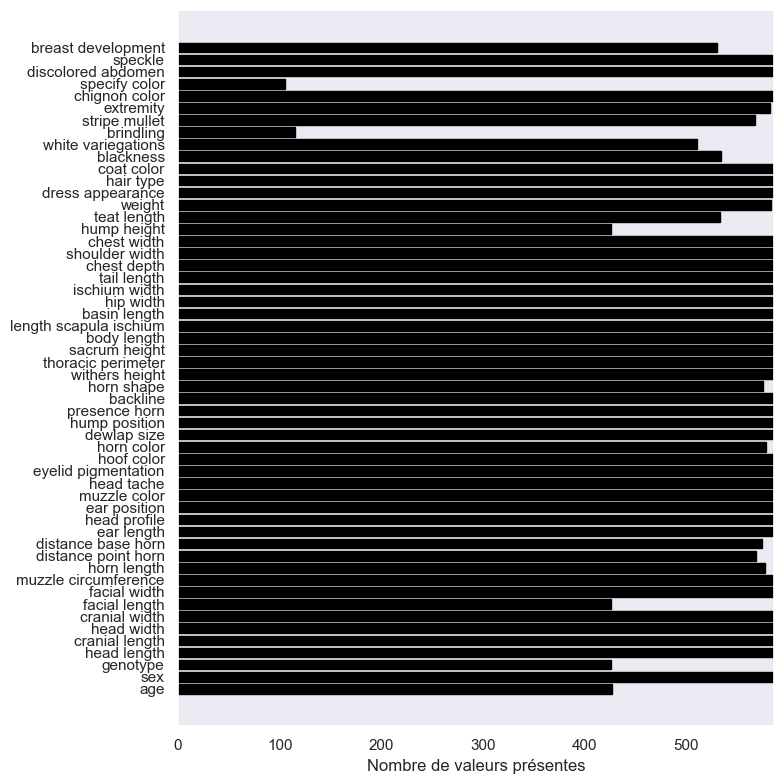

In [ ]:
total = len(db)
non_missing = db.notnull().sum()

plt.figure(figsize=(8, 8), facecolor='white')
bars = plt.barh(non_missing.index, non_missing.values, color='black', edgecolor='black')

#plt.title("Présence de données par colonne (effet creux)")
#plt.tick_params(axis='x', rotation=90)
plt.xlabel("Nombre de valeurs présentes")
plt.xlim(0, total)  # Pour que toutes les barres aient un repère commun
plt.grid(False)
plt.tight_layout()
plt.savefig('missing_val1')
plt.show()

In [ ]:
pwd

'C:\\Users\\DELL'

In [ ]:
print(db['hair type'].unique())

['Short']


la variable 'hair type' n'a qu'une seule valeur. On supprime cet attribut

In [ ]:
#db.drop(['hair type'], axis=1, inplace=True)
df = db.drop(['hair type'], axis=1)

In [ ]:
df['ear position'].value_counts()

ear position
Horizontal    577
Drawn           9
Name: count, dtype: int64

In [ ]:
df.shape

(586, 53)

In [ ]:
df['specify color'].isnull().sum()

481

Nous supprimons la variable 'specify color' car contenant bcp de valeurs manquantes...

In [ ]:
#db.drop(['brindling'], axis=1, inplace=True)
df.drop(['specify color'], axis=1, inplace=True)

In [ ]:
df.shape

(586, 52)

In [ ]:
qualitative_col

Index(['sex', 'head profile', 'ear position', 'muzzle color', 'head tache',
       'eyelid pigmentation', 'hoof color', 'horn color', 'dewlap size',
       'hump position', 'presence horn', 'backline', 'horn shape',
       'dress appearance', 'hair type', 'coat color', 'blackness',
       'white variegations', 'brindling', 'stripe mullet', 'extremity',
       'chignon color', 'specify color', 'discolored abdomen', 'speckle',
       'breast development'],
      dtype='object')

In [ ]:
df.to_csv('base1.csv')

In [ ]:
df['genotype'].unique()

array(['Lobi', 'Crossbread', nan], dtype=object)